# Visualización de datos en Pandas

![](https://miro.medium.com/max/1400/1*YguvfLum39leABj-kt0hMw.png)
La combinación de las librerías Pandas y Matplotlib permiten obtener gráficos a partir de los DataFrames. Aunque es posible utilzar los datos de un DataFrame como argumentos de las instrucciones para construír gráficos de Matplotlib, Pandas accede al Matplotlib API (esto es, a utilizar directamente las funciones gráficas de Matplotlib) de forma tal que puede utilizar sus propios métodos para generar los graficos resultantes.

Luis A.Muñoz (2022)

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime
plt.style.use('ggplot')      # Modificamos el formato del estilo para obtener gráficos más atractivos. Default:('classic')

## Pandas plot
El método df.plot() permite gráficar un DataFrame en una figura con varias opciones. Vamos a crear un DataFrame TimeSeries con datos aleatorios. El rango de fechas se genera con la propiedad `pd.date_range` de `pd.DataFrame`:

In [11]:
df = pd.DataFrame(data=np.random.randn(365), 
                 index=pd.date_range('2021/1/1', periods=365), 
                 columns=['Stock Price'])
df.head()

,Stock Price
2021-01-01,0.216004
2021-01-02,-0.035706
2021-01-03,2.141085
2021-01-04,-0.598204
2021-01-05,1.489718


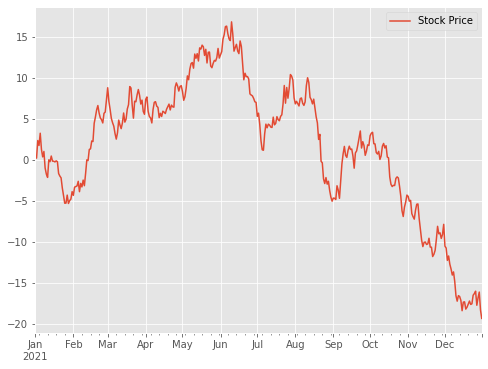

In [12]:
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

In [13]:
df = pd.DataFrame(data=np.random.randn(365, 4), 
                 index=pd.date_range('2021/1/1', periods=365), 
                 columns=['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4'])
df.head()

,Stock 1,Stock 2,Stock 3,Stock 4
2021-01-01,-0.189745,0.876784,-1.726651,1.122178
2021-01-02,0.739709,-1.258054,-0.140899,-0.712622
2021-01-03,0.618689,-0.575263,-1.382187,0.601813
2021-01-04,-0.776371,-0.292875,0.114001,1.858412
2021-01-05,-0.805462,0.117244,-0.690612,-1.404474


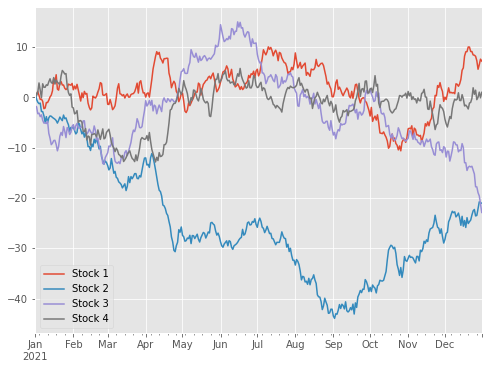

In [14]:
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

Leamos datos reales disponibles en algun recurso web:

In [18]:
end = datetime.now()
start = datetime(end.year, 1, 1)

BTC = pdr.DataReader('BTC-USD', 'yahoo', start, end)

In [19]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-01,47827.312500,46288.484375,46311.746094,47686.812500,24582667004,47686.812500
2022-01-02,47881.406250,46856.937500,47680.925781,47345.218750,27951569547,47345.218750
2022-01-03,47510.726562,45835.964844,47343.542969,46458.117188,33071628362,46458.117188
2022-01-04,47406.546875,45752.464844,46458.851562,45897.574219,42494677905,45897.574219
2022-01-05,46929.046875,42798.222656,45899.359375,43569.003906,36851084859,43569.003906


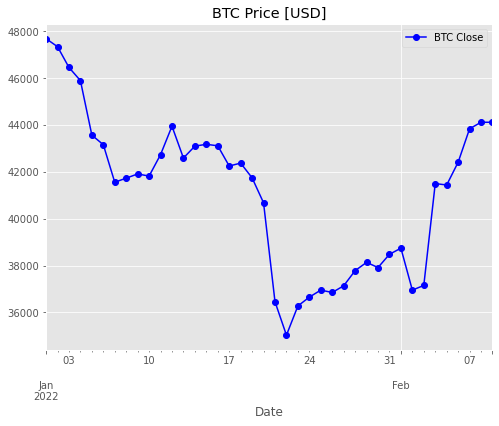

In [25]:
BTC.plot(y='Close', figsize=(8, 6), label="BTC Close", title="BTC Price [USD]", marker='o', color='b')
plt.show()

Si se quiere graficar sobre un axes previamente habilitado, se puede especificar con la propiedad `ax`:

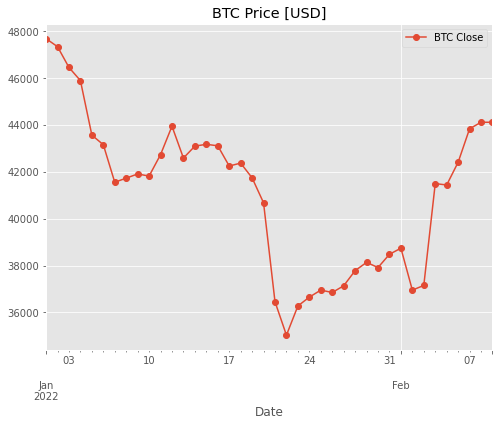

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
BTC.plot(y='Close', figsize=(8, 6), label="BTC Close", title="BTC Price [USD]", marker='o', ax=ax)
plt.show()

## Otros gráficos

Adicionalmente, se pueden obtener estos gráficos adicionales en Pandas:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist         
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

También se puede llamar a `df.plot(kind='hist')` y reemplazar el argunento `kind` con cualquier termino mostrado en la lista anterior e.g. 'box','barh', etc..)

### Bar plot

In [26]:
df = pd.DataFrame(data=np.random.randint(10, 100, (10, 4)))
df.rename(columns=lambda x: "Data" + str(x), inplace=True)
df

,Data0,Data1,Data2,Data3
0,49,40,12,80
1,86,56,30,36
2,35,65,49,43
3,64,88,18,90
4,18,52,42,37
5,53,21,72,95
6,10,77,35,83
7,64,72,90,59
8,35,81,38,46
9,85,43,37,83


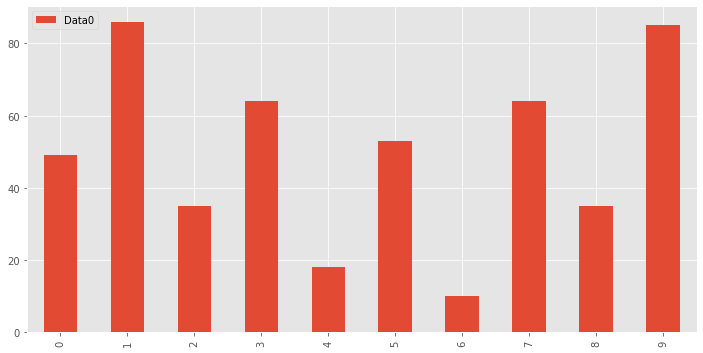

In [28]:
df.plot.bar(y='Data0', figsize=(12, 6))
plt.show()

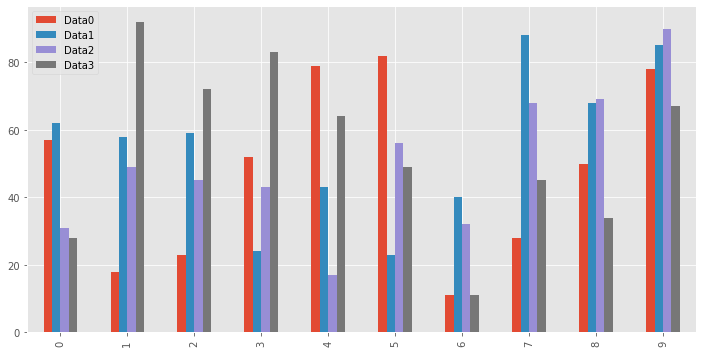

In [16]:
df.plot.bar(figsize=(12, 6))
plt.show()

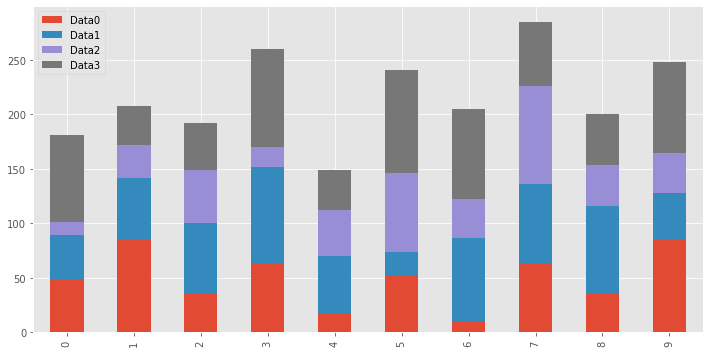

In [32]:
df.plot.bar(figsize=(12, 6), stacked=True)   # color=['b', 'r', 'g', 'k']
plt.show()

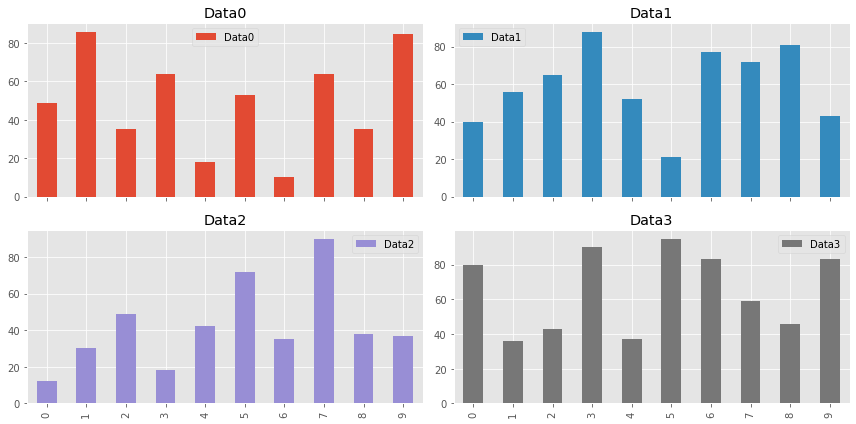

In [33]:
df.plot.bar(subplots=True, layout=(2, 2), figsize=(12, 6))
plt.tight_layout()
plt.show()

### Pie plot

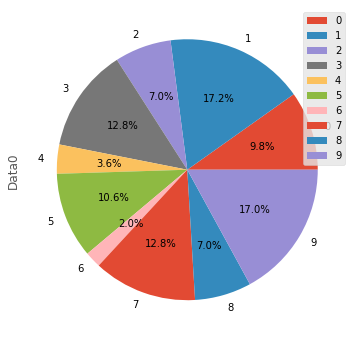

In [43]:
df.plot.pie(y='Data0', figsize=(12, 6), autopct="%.1f%%")
plt.show()

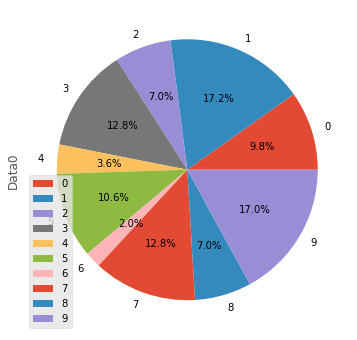

In [44]:
df.plot.pie(y='Data0', figsize=(12, 6), autopct="%.1f%%")
plt.legend(loc='lower left')
plt.show()

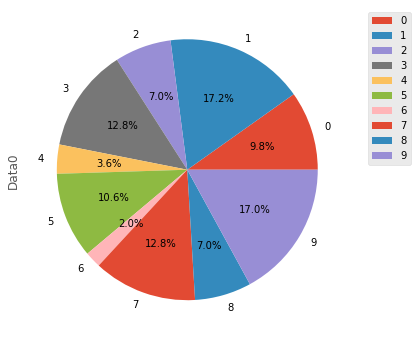

In [51]:
df.plot.pie(y='Data0', figsize=(12, 6), autopct="%.1f%%")
plt.legend(bbox_to_anchor=(1.2, 1))   # Pos de la leyenda ref 1x1 (x, y, width, height)
plt.show()

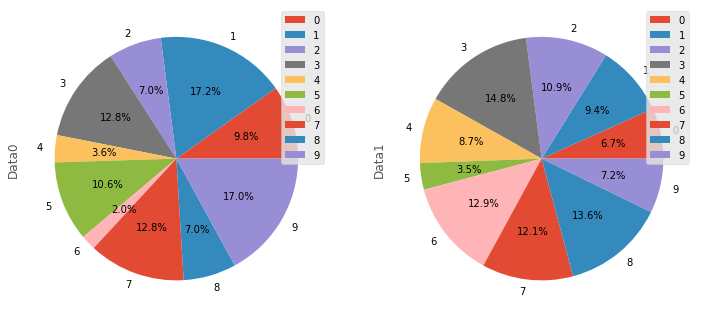

In [55]:
df[['Data0', 'Data1']].plot.pie(figsize=(12, 6), autopct="%.1f%%", subplots=True)
plt.show()

### Histograma

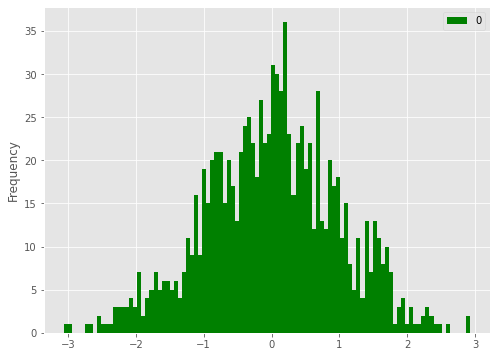

In [56]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(y=0, bins=100, color='g', figsize=(8, 6))
plt.show()

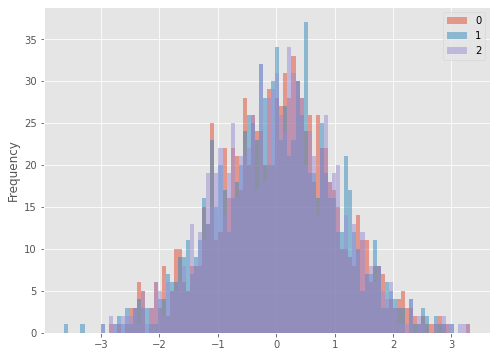

In [58]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(alpha=0.5, bins=100, figsize=(8, 6))
plt.show()

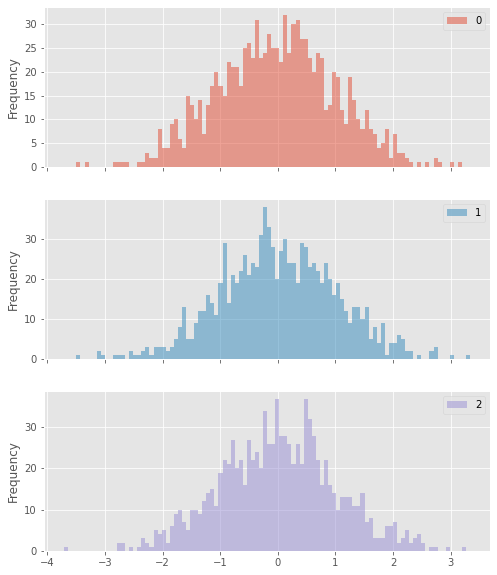

In [63]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(alpha=0.5, bins=100, subplots=True, figsize=(8, 10))
plt.show()

### Scatter plot

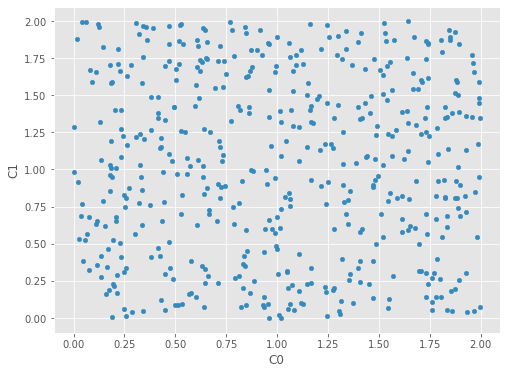

In [64]:
df = pd.DataFrame(data=np.random.uniform(0, 2, (500, 3)),
                 columns=['C0', 'C1', 'C2'])
df.plot.scatter(x='C0', y='C1', figsize=(8, 6))
plt.show()

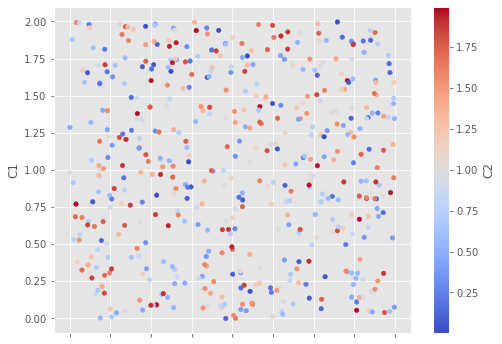

In [65]:
df.plot.scatter(x='C0', y='C1', c='C2', cmap='coolwarm', figsize=(8, 6))    # c = informacion de color
plt.show()

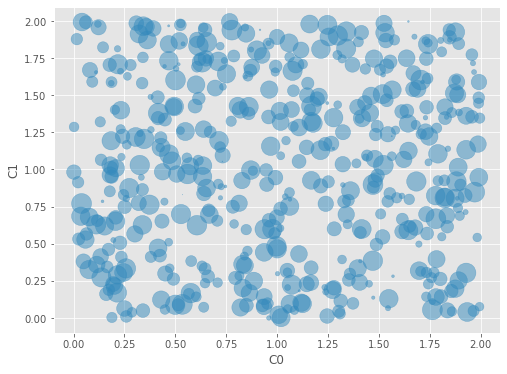

In [66]:
df.plot.scatter(x='C0', y='C1', s=df['C2']*200, alpha=0.5, figsize=(8, 6))   # s debe ser entero
plt.show()

## Seaborn: Otra librería gráfica
Seaborn es una librería gráfica muy utilizada en el ambiente de ciencia de datos, pues entrega resultados gráficos más estéticos y cuenta con más herramentas de visualización. Existen dos formas de utilizar `seaborn`: como soporte de `matplotlib` o como una librería independiente.

Vamos a reiniciar el estilo de `matpotlib` para verificar el estilo que `seaborn` agrega:

In [93]:
import matplotlib.pyplot as plt
plt.style.use('default')

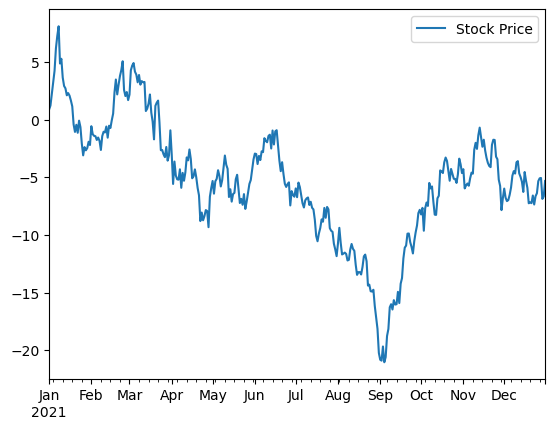

In [94]:
df = pd.DataFrame(data=np.random.randn(365), 
                 index=pd.date_range('2021/1/1', periods=365), 
                 columns=['Stock Price'])
df = df.cumsum()
df.plot()
plt.show()

Seaborn agrega un API con instrucciones de alto-nivel sobre matplotlib, por lo que es posible seguir utilizando las instrucciones anteriores sin ningun cambio, ya que muchas funciones gráficas son reinterpretadas por seaborn:

In [95]:
import seaborn as sns
sns.set()

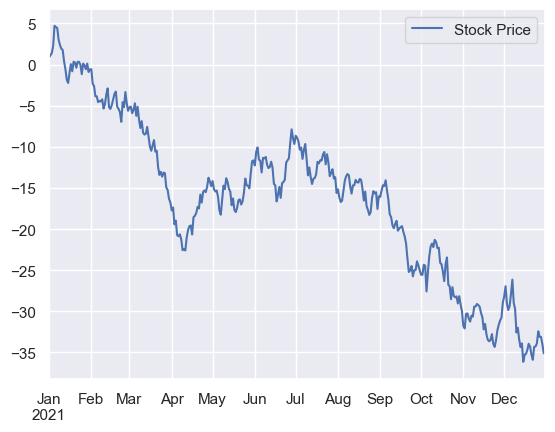

In [97]:
df = pd.DataFrame(data=np.random.randn(365), 
                 index=pd.date_range('2021/1/1', periods=365), 
                 columns=['Stock Price'])
df = df.cumsum()
df.plot()
plt.show()

Se obtienen resultados muy parecidos a el estilo `ggplot` de matplotlib. Por otro lado, se pueden utilizar las herramientas gráficas de seaborn directamente, con lo que se obtienen resultados gráficos más estéticos. Los detalles del uso de la librería de esta forma escapan del alcance de este curso, pero se muestra un péqueño código de referencia.

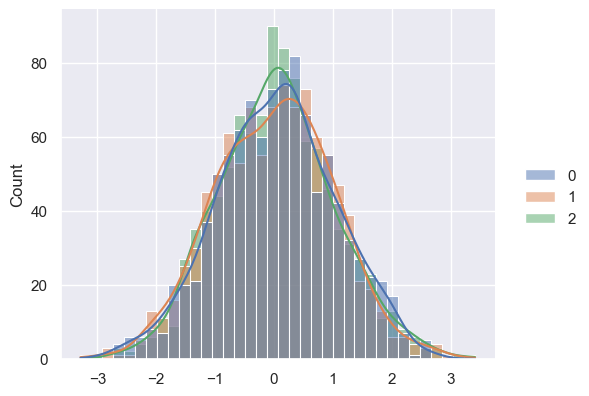

In [116]:
df = pd.DataFrame(data=np.random.randn(1000, 3))

g = sns.displot(data=df, alpha=0.5, kde=True)
g.fig.set_size_inches(6, 4)
plt.show()